# Table of Content

# Heart Disease Data Set

# Data Set Information:

This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).


# Attribute details:

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('heart_disease.csv',names=range(0,14))
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [2]:
# as we can see the data set doesn't provided with columns name lets set the columns name first so that we can understand the data better.
data.rename(columns={0:'age',1:'sex',2:'cp',3:'trestbps',4:'chol',5:'fbs',6:'restecg',7:'thalach',8:'exang',9:'oldpeak',10:'slope',11:'ca',12:'thal',13:'target'},inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
# so as we can observe the some data contains (?) which is not required so just drop that row.
data = data.replace({'?': np.nan}).dropna().astype(float)

In [4]:
# as we can see we dropped the ?
data.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object

In [5]:
# Diagnosis of heart disease(target) : Displays whether the individual is suffering from heart disease or not :
# 0 = absence
# 1, 2, 3, 4 = present.
#lets change all the 2,3,4 value with and make the data binary so that it can help in model building.
print(data['target'].value_counts())
data['target']=data['target'].replace(2,1)
data['target']=data['target'].replace(3,1)
data['target']=data['target'].replace(4,1)

0.0    160
1.0     54
3.0     35
2.0     35
4.0     13
Name: target, dtype: int64


In [6]:
# lets convert all the column to integer value except oldpeak
data = data.apply(pd.to_numeric,downcast='integer')

In [7]:
#we can observe all my data is converted to int except the oldpeak cause that is need of the moments.
data.dtypes

age            int8
sex            int8
cp             int8
trestbps      int16
chol          int16
fbs            int8
restecg        int8
thalach       int16
exang          int8
oldpeak     float64
slope          int8
ca             int8
thal           int8
target         int8
dtype: object

In [8]:
#now my data is ready for exploration.
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


# Summary statistics

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [10]:
#lets check the null value i out datasets
data.isnull().sum()
# we can observe their is no null value present.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

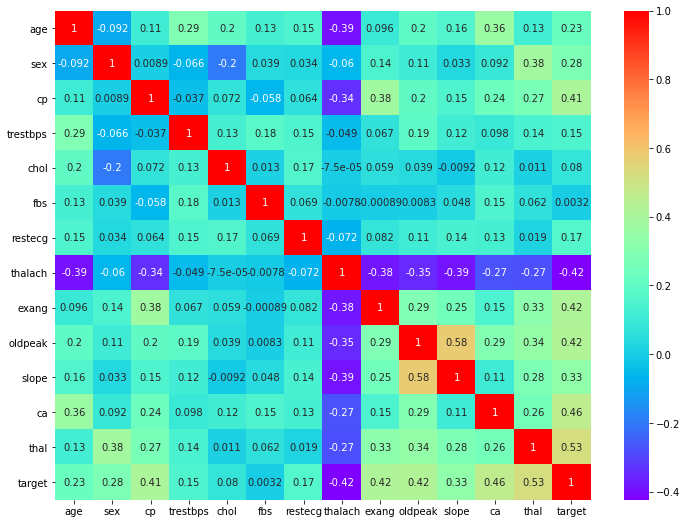

In [11]:
# lets plot correlatio matrix of our data set
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot=True,cmap='rainbow')

0 as No disease 	 1 as Affected

0    160
1    137
Name: target, dtype: int64
--------------------------------------------------


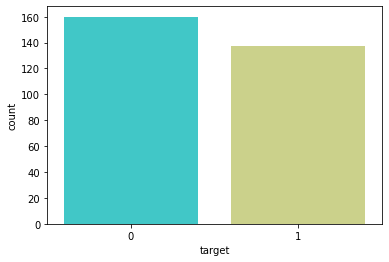

In [12]:
# lets check the impact of Heart disease
import matplotlib.pyplot as plt
print('0 as No disease','\t','1 as Affected')
print()
print(data['target'].value_counts())
print('--------------------------------------------------')
sns.countplot(x='target', data=data, palette='rainbow')
plt.show()
# we can observe the 160 with no disease case and 137 with disease case.

Text(0, 0.5, 'target')

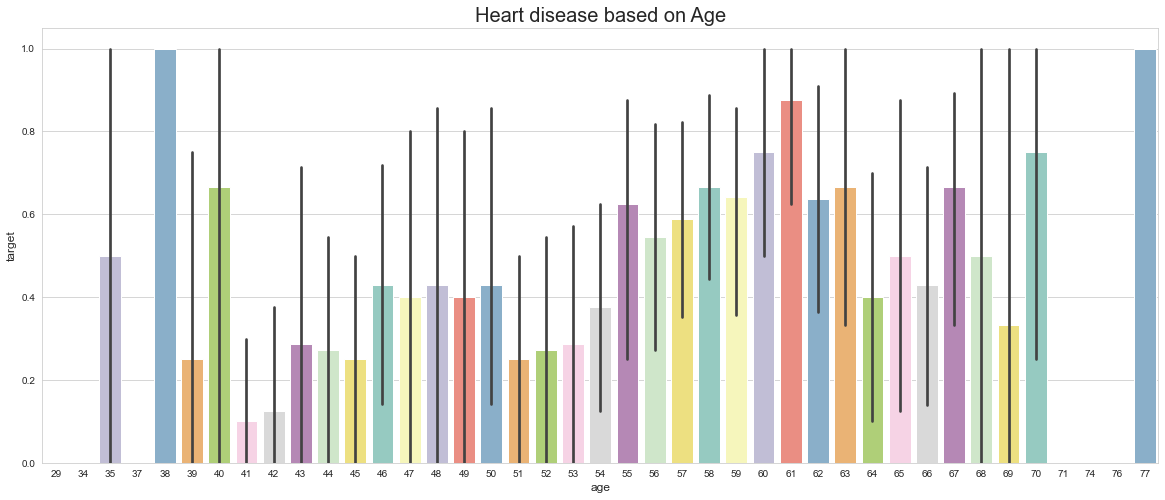

In [13]:
# lets plot cases according age.
import numpy as np
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
plt.xticks(np.linspace(1,2,5))
plt.title('Heart disease based on Age',{'fontsize':20})
sns.barplot(x='age',y='target',palette="Set3",data=data)
plt.xlabel('age',{'fontsize' : 'large'})
plt.ylabel('target',{'fontsize':'large'})


Text(0, 0.5, 'age')

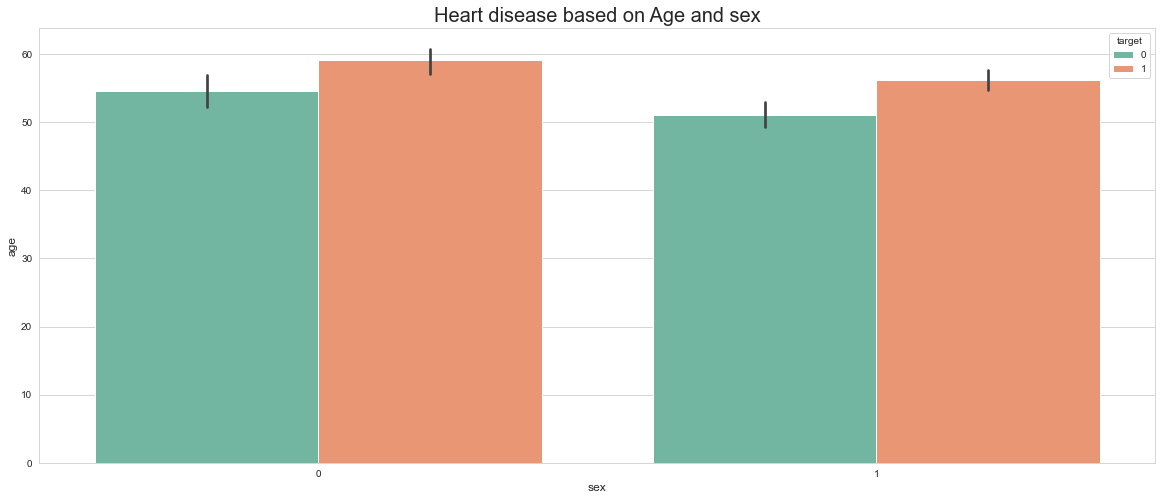

In [14]:
import numpy as np
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
plt.xticks(np.linspace(1,2,5))
plt.title('Heart disease based on Age and sex',{'fontsize':20})
sns.barplot(x='sex',y='age',hue='target',data=data,palette="Set2")
plt.xlabel('sex',{'fontsize' : 'large'})
plt.ylabel('age',{'fontsize':'large'})

In [15]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:xlabel='slope', ylabel='oldpeak'>

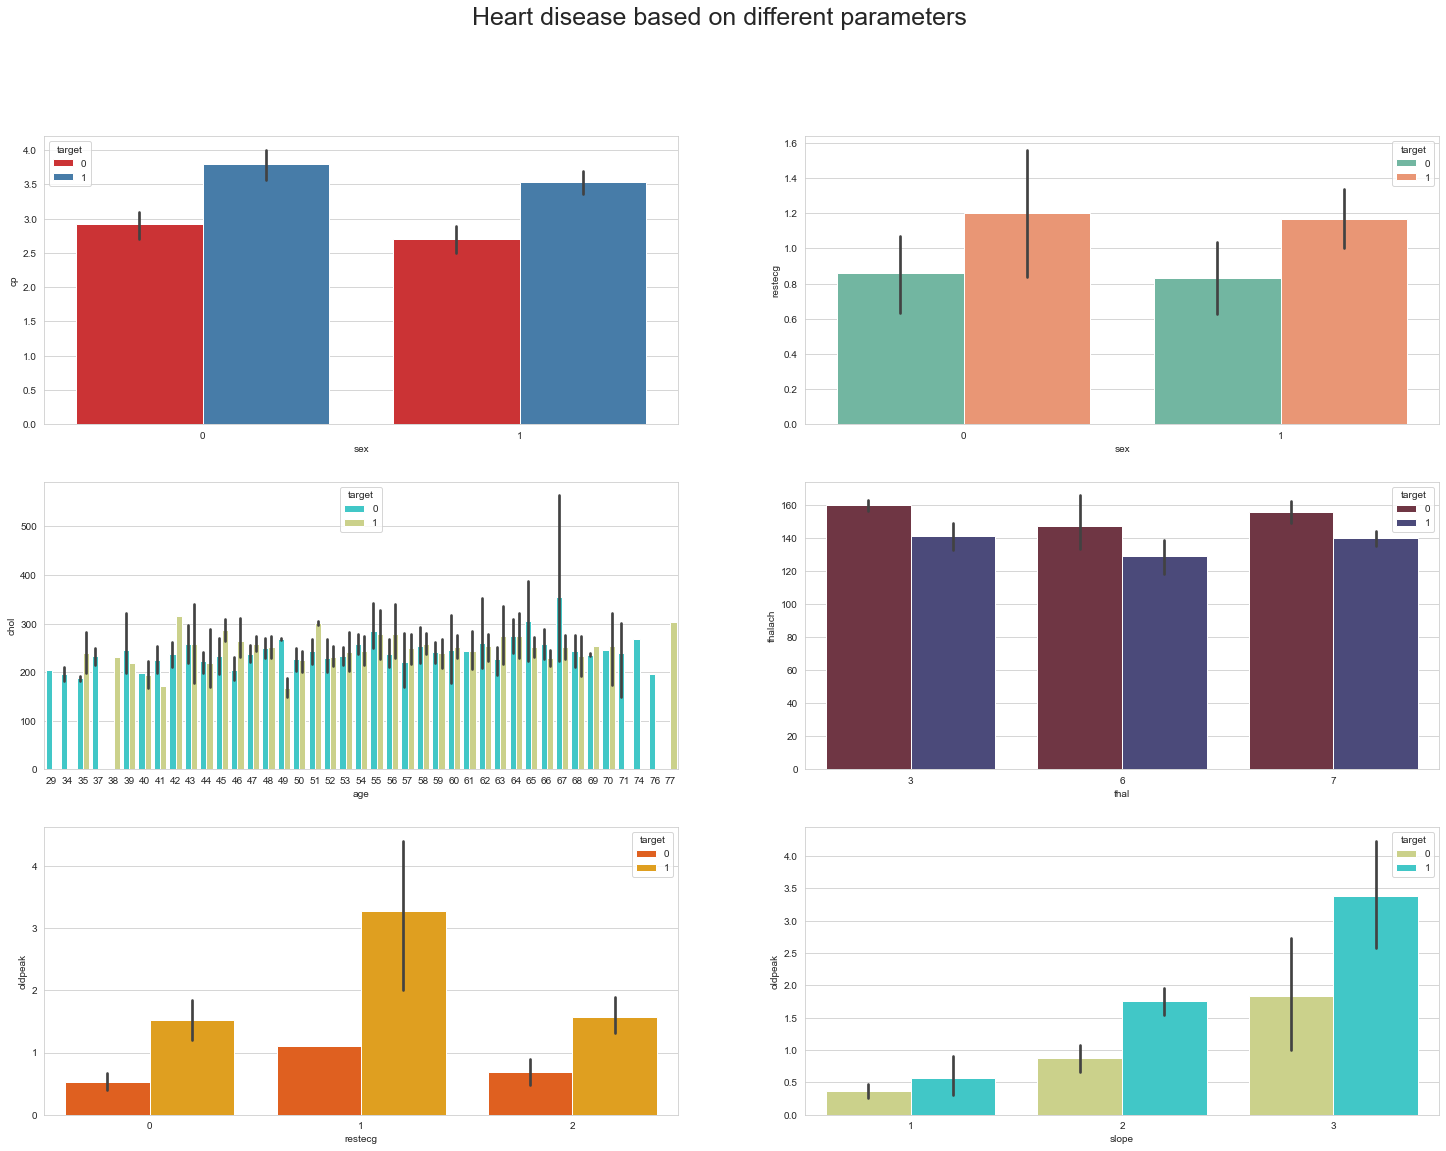

In [16]:
# let plot different plot based on target variables.
fig, axes = plt.subplots(3, 2, figsize=(25, 18))

fig.suptitle('Heart disease based on different parameters',fontsize=25)
sns.set_style('whitegrid')

sns.barplot(ax=axes[0, 0],x='sex',y='cp',hue='target',data=data,palette="Set1")
sns.barplot(ax=axes[0, 1],x='sex',y='restecg',hue='target',data=data,palette="Set2")
sns.barplot(ax=axes[1, 0],x='age',y='chol',hue='target',data=data,palette="rainbow")
sns.barplot(ax=axes[1, 1],x='thal',y='thalach',hue='target',data=data,palette="icefire_r")
sns.barplot(ax=axes[2, 0],x='restecg',y='oldpeak',hue='target',data=data,palette="autumn")
sns.barplot(ax=axes[2, 1],x='slope',y='oldpeak',hue='target',data=data,palette="rainbow_r")


# Lets start building the model for prediction 

In [17]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


In [18]:
# lets sepearate input output columns
df_x=data.drop(columns=['target']) # Input variable.
y=pd.DataFrame(data['target']) #Target Variable.

In [19]:
df_x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7


# To check distribution of skewness

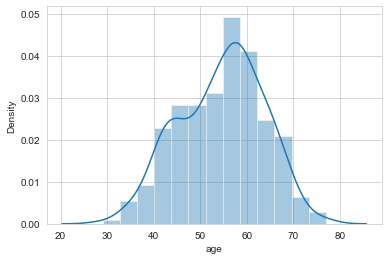

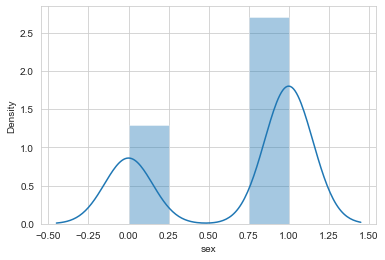

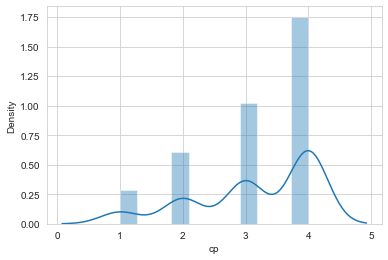

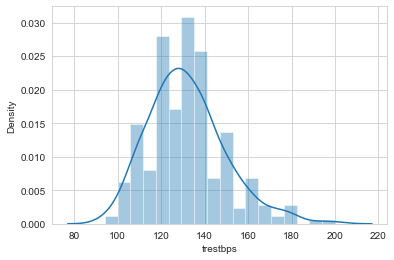

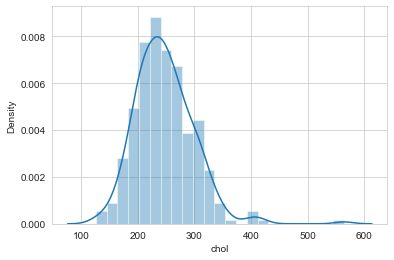

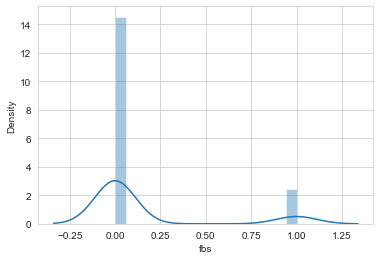

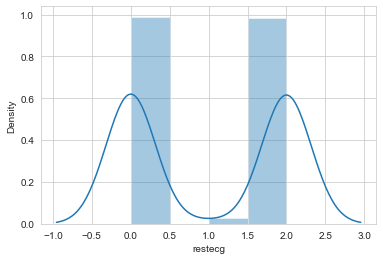

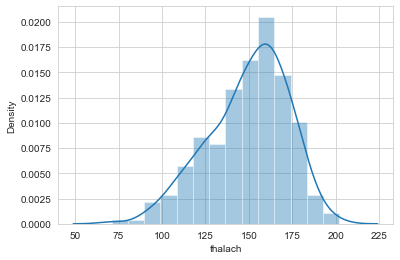

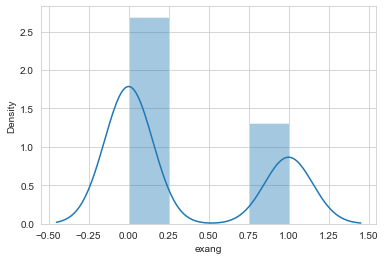

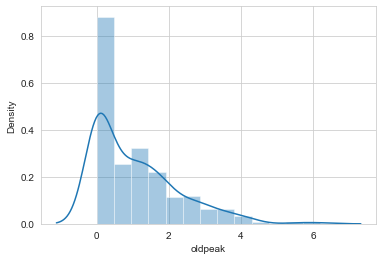

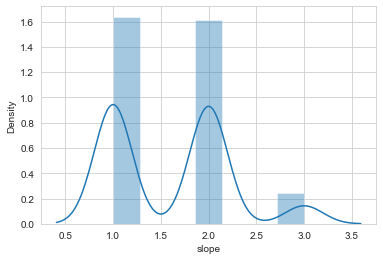

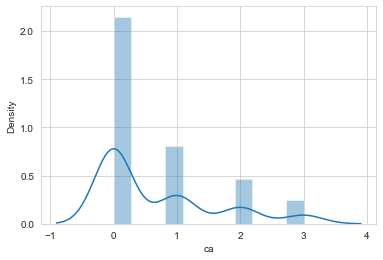

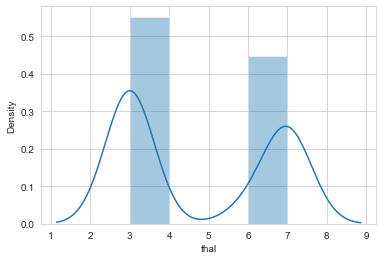

In [20]:
import warnings
warnings.filterwarnings('ignore')
for i in df_x.columns:
    sns.distplot(df_x[i])
    plt.show()
    # we can age,trestbps,chol,finalch,restecg has almost normally distributed

In [21]:
#lets check the skewness of data.
df_x.skew()
# we can observe that some of data is been skewed

age        -0.219775
sex        -0.759727
cp         -0.844412
trestbps    0.700070
chol        1.118096
fbs         2.029240
restecg     0.006768
thalach    -0.536540
exang       0.743256
oldpeak     1.247131
slope       0.510444
ca          1.179548
thal        0.247772
dtype: float64

In [22]:
# lets apply log transformation and treat the skewd data
for col in df_x.columns:
    if df_x.skew().loc[col]>0.55:
        df_x[col]=np.log1p(df_x[col])

In [23]:
df_x.skew()
# we can observe that the data is much more countable than before 

age        -0.219775
sex        -0.759727
cp         -0.844412
trestbps    0.282484
chol        0.061315
fbs         2.029297
restecg     0.006768
thalach    -0.536540
exang       0.743164
oldpeak     0.373601
slope       0.510444
ca          0.739258
thal        0.247772
dtype: float64

# Removing outliers

In [24]:
#lets remove the outliers using zscore
from scipy.stats import zscore
z=abs(zscore(df_x))
print(df_x.shape)
new=df_x.loc[(z<3).all(axis=1)]
print(new.shape)
# we can obsere some of our data is been reduced hence the outliers is been removed

(297, 13)
(292, 13)


# Model Training
As we can observe in this data set , that we can predict this Target which in binary value wheteher the person is having disease or not
so we can use here logistic regression cause my Target variable is in binary value 0 or 1.

In [25]:
#Before moving forward lets scale our data.
# lets scale the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x
# WE CAN NOTICE OUR DATA IS BEEN SCALED.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.936181,0.691095,-2.240629,0.797819,-0.191088,2.430427,1.010199,0.017494,-0.696419,1.174672,2.264145,-0.786671,0.655877
1,1.378929,0.691095,0.873880,1.546627,0.815022,-0.411450,1.010199,-1.816334,1.435916,0.645463,0.643781,2.041722,-0.894220
2,1.378929,0.691095,0.873880,-0.640237,-0.276057,-0.411450,1.010199,-0.899420,1.435916,1.340529,0.643781,1.454133,1.172577
3,-1.941680,0.691095,-0.164289,-0.032242,0.154524,-0.411450,-1.003419,1.633010,-0.696419,1.765876,2.264145,-0.786671,-0.894220
4,-1.498933,-1.446980,-1.202459,-0.032242,-0.843122,-0.411450,1.010199,0.978071,-0.696419,0.567650,-0.976583,-0.786671,-0.894220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.272059,-1.446980,0.873880,0.531007,-0.025424,-0.411450,-1.003419,-1.161395,1.435916,-0.753596,0.643781,-0.786671,1.172577
293,-1.056185,0.691095,-2.240629,-1.300709,0.422002,-0.411450,-1.003419,-0.768432,-0.696419,0.401793,0.643781,-0.786671,1.172577
294,1.489615,0.691095,0.873880,0.745194,-1.114912,2.430427,-1.003419,-0.375469,-0.696419,1.723039,0.643781,1.454133,1.172577
295,0.272059,0.691095,0.873880,-0.032242,-3.012479,-0.411450,-1.003419,-1.510696,1.435916,0.401793,0.643781,0.627526,1.172577


In [26]:
#lets check the skewness again
x.skew()

age        -0.219775
sex        -0.759727
cp         -0.844412
trestbps    0.282484
chol        0.061315
fbs         2.029240
restecg     0.006768
thalach    -0.536540
exang       0.743256
oldpeak     0.373601
slope       0.510444
ca          0.739154
thal        0.247772
dtype: float64

In [27]:
# Breaking our input and target data into train and test data.
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42,stratify=y)


In [28]:
#importing varios classification model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# saving different algorithm with respective name
KNN=KNeighborsClassifier()
SVC=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier()
GNB=GaussianNB()

In [30]:
models= []
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SVC))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [31]:
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict
import seaborn as sns

****************************** KNeighborsClassifier ***************************


KNeighborsClassifier(n_neighbors=9)


accuracy_score= 0.8666666666666667


cross_val_score 0.8248275862068967


roc_auc_score =  0.8638392857142857


classification_report               precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



[[29  3]
 [ 5 23]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


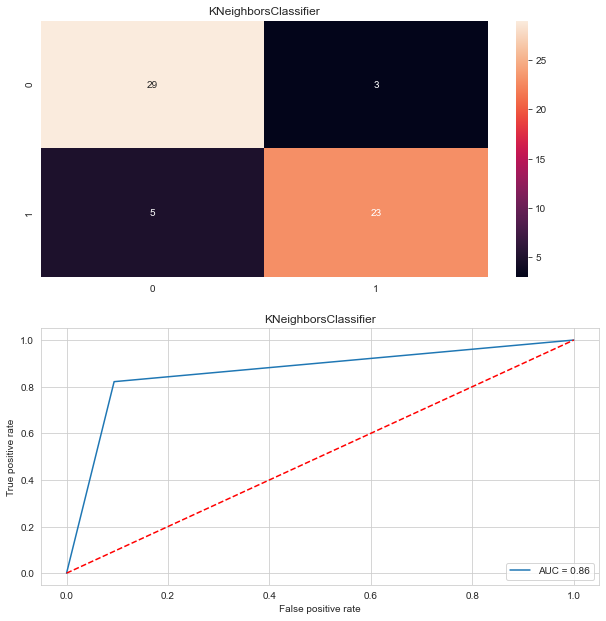





****************************** SVC ***************************


SVC()


accuracy_score= 0.85


cross_val_score 0.8314942528735634


roc_auc_score =  0.84375


classification_report               precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.91      0.75      0.82        28

    accuracy                           0.85        60
   macro avg       0.86      0.84      0.85        60
weighted avg       0.86      0.85      0.85        60



[[30  2]
 [ 7 21]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


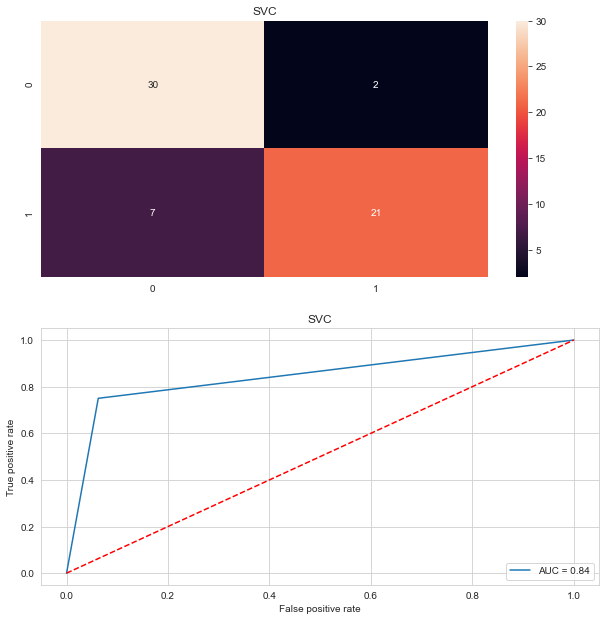





****************************** LogisticRegression ***************************


LogisticRegression()


accuracy_score= 0.8333333333333334


cross_val_score 0.8283908045977013


roc_auc_score =  0.8303571428571429


classification_report               precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



[[28  4]
 [ 6 22]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


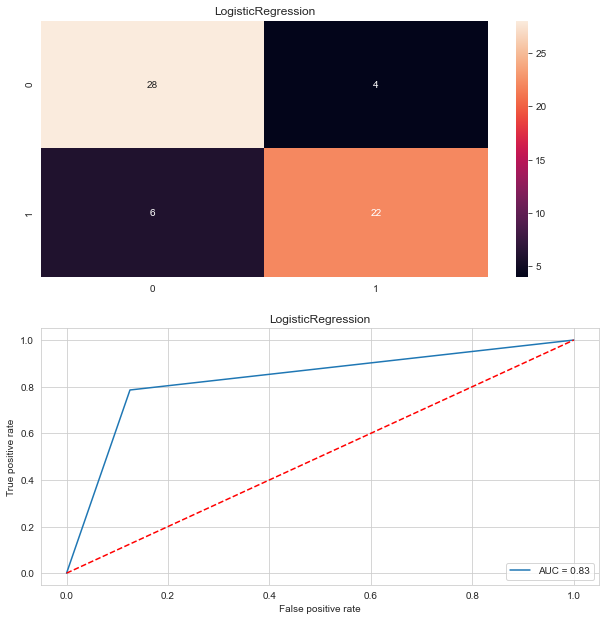





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier(random_state=6)


accuracy_score= 0.6833333333333333


cross_val_score 0.7778160919540229


roc_auc_score =  0.6785714285714285


classification_report               precision    recall  f1-score   support

           0       0.69      0.75      0.72        32
           1       0.68      0.61      0.64        28

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.68      0.68      0.68        60



[[24  8]
 [11 17]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


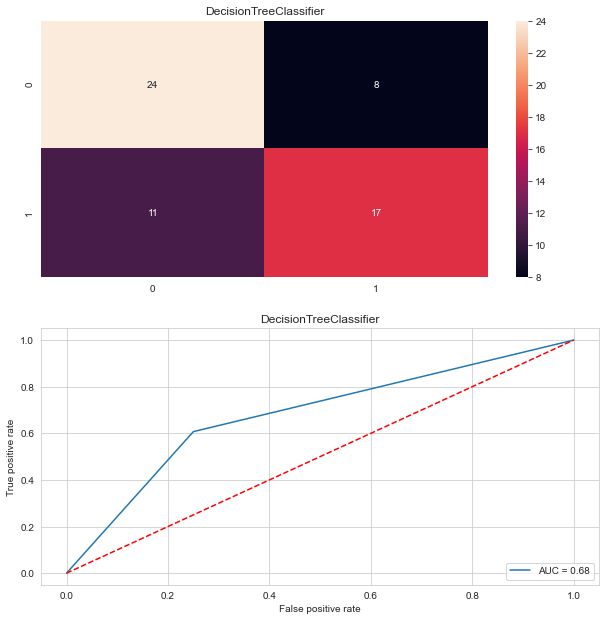





****************************** GaussianNB ***************************


GaussianNB()


accuracy_score= 0.8666666666666667


cross_val_score 0.8283908045977013


roc_auc_score =  0.8638392857142857


classification_report               precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



[[29  3]
 [ 5 23]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


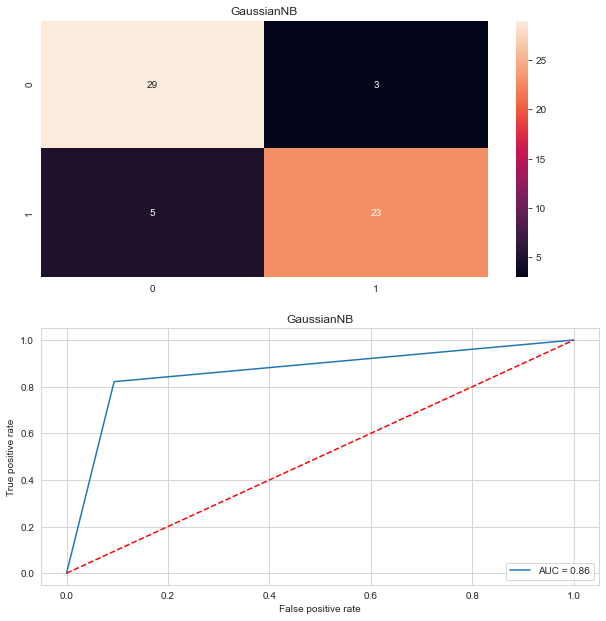

In [32]:
# lets make the for loop and call the algorithm one by one and save data to respective model using append function.
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')


In [33]:
# saving the result to a single datframe.
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'roc_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,roc_auc_score
0,KNeighborsClassifier,86.666667,82.482759,86.383929
1,SVC,85.000000,83.149425,84.375000
2,LogisticRegression,83.333333,82.839080,83.035714
3,DecisionTreeClassifier,68.333333,77.781609,67.857143
4,GaussianNB,86.666667,82.839080,86.383929


In [34]:
# lets apply grid search cv to get the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsClassifier()
gknr=GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x_train,y_train)
print(gknr.best_params_)
print(gknr.best_score_)

{'n_neighbors': 29}
0.8390070921985815


In [35]:
knr=KNeighborsClassifier(n_neighbors=34)
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
print("Accuracy for Kneighbors classifier : ",accuracy_score(y_test,pred)*100)
print('Cross validation score with Kneighbors :',cross_val_score(knr,x,y,cv=10,scoring='accuracy').mean()*100)
# so we can observe below a better result of kneighbors using grid search cv, lets explore more.

Accuracy for Kneighbors classifier :  86.66666666666667
Cross validation score with Kneighbors : 83.49425287356323


# Using Ensemble boosting Technique.

In [36]:
# lets finfd the best parameter using ensemble techniques.
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
parameters={'n_estimators':[10,100,500,1000],'criterion' :['gini', 'entropy']}
rfc=GridSearchCV(estimator=rfc,param_grid=parameters,cv=5)
rfc.fit(x_train,y_train)
print(rfc.best_params_)
print(rfc.best_score_)

{'criterion': 'gini', 'n_estimators': 100}
0.826418439716312


In [37]:
rfc1=RandomForestClassifier(random_state=42,n_estimators=100,criterion='gini')
rfc1.fit(x_train,y_train)
pred=rfc1.predict(x_test)
print("Accuracy for Random Forest classifier: ",accuracy_score(y_test,pred)*100)
print('Cross validation score with Kneighbors :',cross_val_score(rfc1,x,y,cv=10,scoring='accuracy').mean()*100)

Accuracy for Random Forest classifier:  86.66666666666667
Cross validation score with Kneighbors : 81.80459770114943


In [38]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier()
knr=KNeighborsClassifier()
parameters={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
adc=GridSearchCV(estimator=adc,param_grid=parameters,cv=5)
adc.fit(x_train,y_train)
print(adc.best_params_)
print(adc.best_score_)

{'learning_rate': 0.001, 'n_estimators': 2000}
0.8265070921985818


In [39]:
adc=AdaBoostClassifier(n_estimators=2000,learning_rate=0.0001)
adc.fit(x_train,y_train)
pred=adc.predict(x_test)
print("Accuracy for ADA on CV data: ",accuracy_score(y_test,pred))
print('Cross validation score with Kneighbors :',cross_val_score(adc,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy for ADA on CV data:  0.7166666666666667
Cross validation score with Kneighbors : 76.03389830508475


Prediction For random forest Classifier [0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1
 1]
AxesSubplot(0.125,0.125;0.775x0.755)


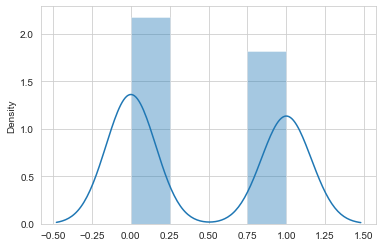

In [40]:
#Predicting result for Random Forest Classifier.
hd_prediction_rfc1=rfc1.predict(x)
print('Prediction For random forest Classifier',hd_prediction_rfc1)
print(sns.distplot([hd_prediction_rfc1]))
plt.show()

In [41]:
#Predicting result for Kneighbors Classifier.
knr=KNeighborsClassifier(n_neighbors=34)
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
print("Accuracy for Kneighbors classifier : ",accuracy_score(y_test,pred)*100)
print('Cross validation score with Kneighbors :',cross_val_score(knr,x,y,cv=10,scoring='accuracy').mean()*100)
# so we can observe below a better result of kneighbors using grid search cv, lets explore more.

Accuracy for Kneighbors classifier :  86.66666666666667
Cross validation score with Kneighbors : 83.49425287356323


Prediction For random forest Classifier [0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1
 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0
 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1
 0]
AxesSubplot(0.125,0.125;0.775x0.755)


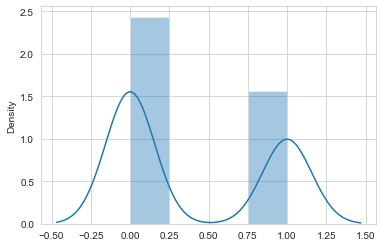

In [42]:
#Predicting result for Kneighbors Classifier.
hd_prediction=knr.predict(x)
print('Prediction For random forest Classifier',hd_prediction)
print(sns.distplot([hd_prediction]))
plt.show()

In [43]:
# finalising the Random Forest Model.
rfc1=RandomForestClassifier(random_state=48,n_estimators=500,criterion='gini')
rfc1.fit(x_train,y_train)
pred=rfc1.predict(x_test)
print("Accuracy for Random Forest classifier: ",accuracy_score(y_test,pred)*100)
print('Cross validation score with Kneighbors :',cross_val_score(rfc1,x,y,cv=5,scoring='accuracy').mean()*100)

Accuracy for Random Forest classifier:  86.66666666666667
Cross validation score with Kneighbors : 82.45197740112994


In [44]:
# lets Save the model
import joblib
joblib.dump(rfc1,'Heart_disease.pkl')

['Heart_disease.pkl']

# Lets save the predicted output to csv file.

In [45]:
#lets save the predicted result to excel file.
df=pd.DataFrame(hd_prediction_rfc1)
df.to_csv('Heart_Classification_prediction_result.csv')

# Conclusion:
